In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8
%matplotlib inline
import plotly.express as px 

In [2]:
ds = pd.read_csv(r'C:\Users\tyagir01\Desktop\Train_SU63ISt.csv', index_col = [0], parse_dates=True)
ds.head()

,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [3]:
ds.Timestamp = pd.to_datetime(ds.Datetime,format='%d-%m-%Y %H:%M') 
ds.head()

C:\Users\tyagir01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [4]:
ds.index = ds.Timestamp 
ds = ds.resample('D').mean()
ds.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


In [5]:
type(ds)

pandas.core.frame.DataFrame

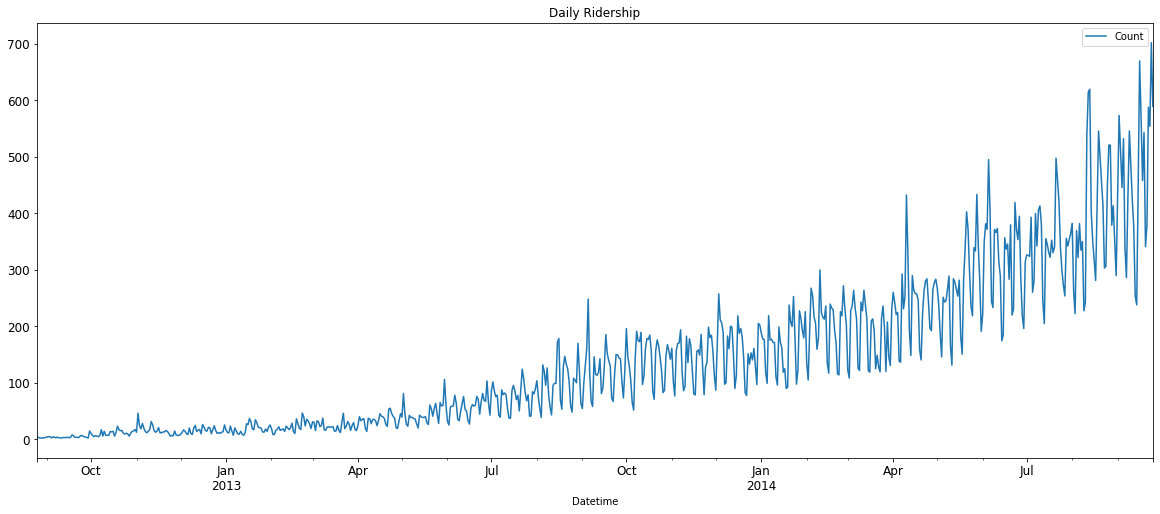

In [5]:
ds.plot(figsize=(20,8), title= 'Daily Ridership', fontsize=12)

In [6]:
print("Rows : ", ds.shape[0])
print("Columns : ", ds.shape[1])
print("Features : ", ds.columns.tolist())
print("Missing Values : ", ds.isnull().any())
print("Unique Values : ", ds.nunique())

Rows :  762
Columns :  1
Features :  ['Count']
Missing Values :  Count    False
dtype: bool
Unique Values :  Count    665
dtype: int64


In [9]:
import pmdarima as pm
model = pm.auto_arima(ds, m=7, seasonal=True, start_p = 0, start_q=0, max_order = 10, trend='ct', test='adf', error_action='ignore',suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=7521.209, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8180.359, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7720.459, Time=0.58 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7918.794, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8180.359, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=7955.197, Time=0.35 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=7754.890, Time=0.42 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=7518.860, Time=1.95 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=7642.060, Time=0.87 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=7520.174, Time=2.13 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=7646.605, Time=2.27 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=7651.495, Time=3.47 sec
 ARIMA(0,1,0)(2,0,1)[7]             : AIC=75

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  762
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -3753.430
Date:                             Fri, 28 Aug 2020   AIC                           7518.860
Time:                                     22:05:00   BIC                           7546.668
Sample:                                          0   HQIC                          7529.568
                                             - 762                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.745     -0.001      0.999      -1.461       1.459
drift          0.0001      0.001      0.117      0.907      -0.002       0.003
ar.S.L7        1.0036      0.032     31.422      0.000       0.941       1.066
ar.S.L14      -0.0044      0.032     -0.137      0.891      -0.067       0.058
ma.S.L7       -0.8427      0.015    -55.911      0.000      -0.872      -0.813
sigma2      1099.1709     26.357     41.703      0.000    1047.512    1150.830
===================================================================================
Ljung-Box (Q):                      171.65   Jarque-Bera (JB):              2178.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              43.75   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from pmdarima.model_selection import train_test_split
train, test = train_test_split(ds, train_size = 671)

In [12]:
model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend='ct',
      with_intercept=True)

In [13]:
forecasts = model.predict(test.shape[0])

In [14]:
forecast_df = pd.DataFrame(forecasts, index=test.index, columns=['Predicted Sales'])
forecast_df.head()

,Predicted Sales
Datetime,
2014-06-27,392.295044
2014-06-28,286.701808
2014-06-29,281.948317
2014-06-30,420.120377
2014-07-01,412.718144


In [15]:
from sklearn.metrics import mean_squared_error
print('Auto_ARIMA Model RMSE:{}'.format(np.sqrt(mean_squared_error(test['Count'], forecast_df['Predicted Sales']))))

Auto_ARIMA Model RMSE:116.35016742256443


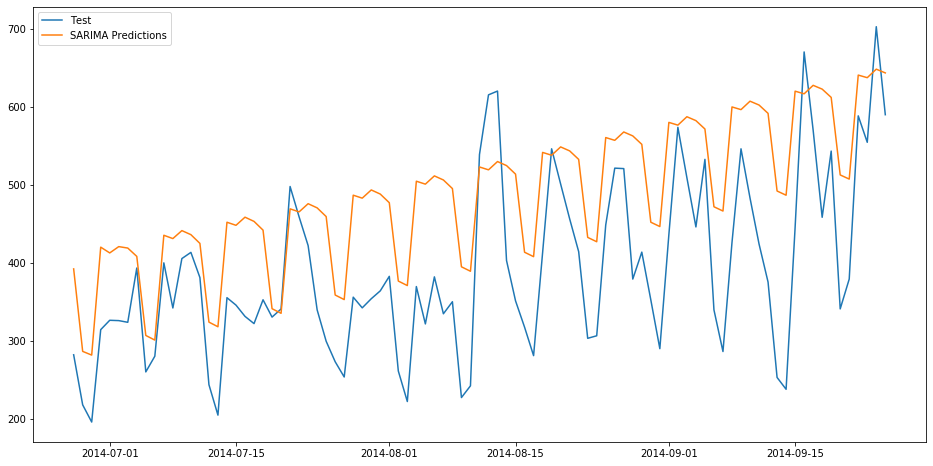

In [16]:
plt.figure(figsize=(16,8))
plt.plot(test['Count'], label='Test')
plt.plot(forecast_df['Predicted Sales'], label='SARIMA Predictions')
plt.legend(loc='best')

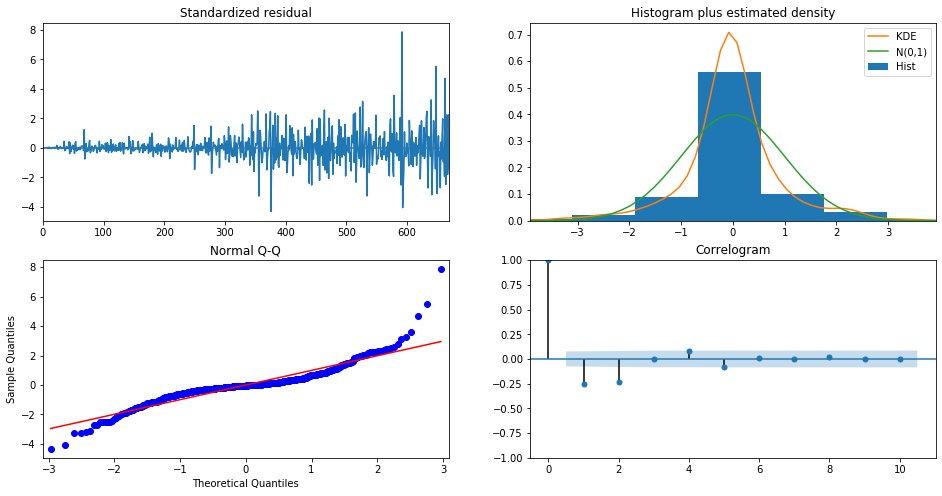

In [17]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

# Holt Winter Method

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [19]:
hw_model = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()

In [20]:
forecast_df['Holt_Winter'] = hw_model.forecast(len(test))

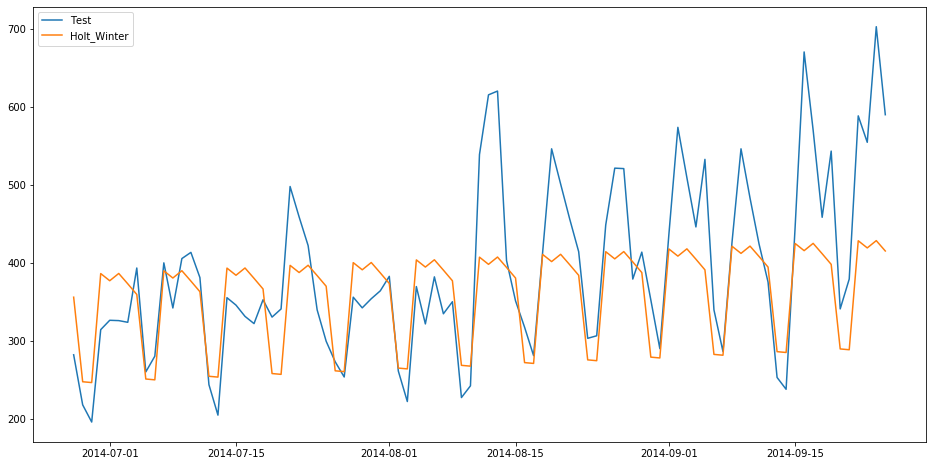

In [21]:
plt.figure(figsize=(16,8))
plt.plot(test['Count'], label='Test')
plt.plot(forecast_df['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [22]:
rms = np.sqrt(mean_squared_error(test.Count, forecast_df.Holt_Winter))
print(rms)

83.48693535013795
